In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Drawing.DrawLoadDia import LoadingDiagram


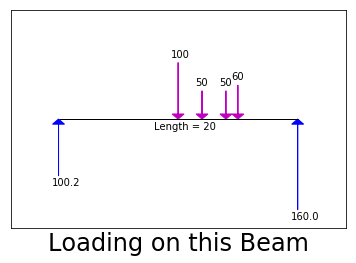

In [2]:
def calcReactions(loadIntensity, a, length):
    rightReactions = 0
    leftReactions = 0.2
    for index in range(0,len(loadIntensity)):
        rightReaction = loadIntensity[index]*a[index] / length
        leftReaction = loadIntensity[index] - rightReaction
        rightReactions += rightReaction
        leftReactions += leftReaction
    
    return(leftReactions,rightReactions)

def GetNormalisedValues(loadIntensity):
    normalisationValue = max(loadIntensity)
    return 10/normalisationValue

loadDist =[10,12,14,15]
loadIntensities = [100,50,50,60]
spanLength = 20
leftReaction, rightReaction = calcReactions(loadIntensities,loadDist,spanLength)
allForces = loadIntensities
allForces.append(leftReaction)
allForces.append(rightReaction)

normalisationValue = GetNormalisedValues(allForces)

suppReactionList = []
suppReactionDistList = []
suppReactionDistList.append(0)
suppReactionList.append(leftReaction)
suppReactionDistList.append(spanLength)
suppReactionList.append(rightReaction)


fig = plt.figure()
ax = plt.axes()
LoadingDia = LoadingDiagram(normalisationValue)
LoadingDia.DrawBoundingBox(ax, spanLength,max(allForces))
LoadingDia.DrawSpan(ax, spanLength)
LoadingDia.DrawLoadsAndReactions(ax, loadDist, loadIntensities, False)
LoadingDia.DrawLoadsAndReactions(ax, suppReactionDistList, suppReactionList, True)

plt.show()